In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv('nhanes_2015_2016.csv')

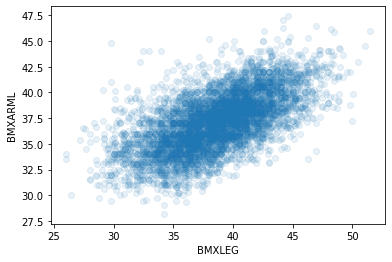

In [3]:
sns.regplot(x="BMXLEG", y="BMXARML", data=df, scatter_kws={"alpha": 0.1}, fit_reg=False)

/home/user/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


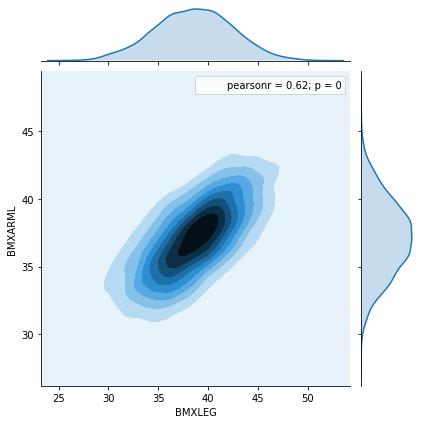

In [4]:
sns.jointplot(x=df.BMXLEG, y=df.BMXARML, kind="kde").annotate(stats.pearsonr)

/home/user/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


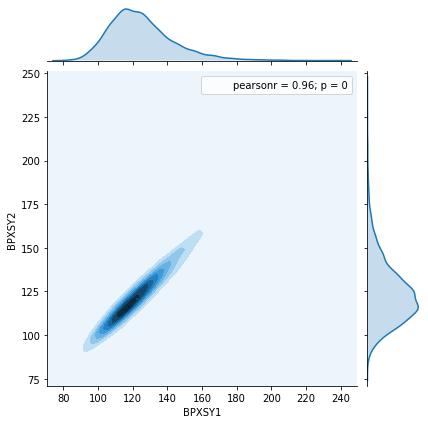

In [5]:
sns.jointplot(df.BPXSY1, df.BPXSY2, kind="kde").annotate(stats.pearsonr)

## Heteroginety and stratification

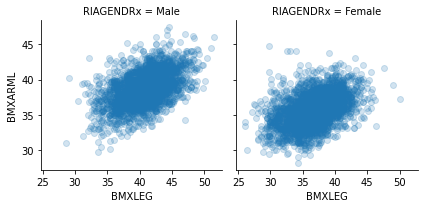

In [13]:
df['RIAGENDRx'] = df.RIAGENDR.replace({1: "Male", 2: "Female"})
sns.FacetGrid(df, col="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.2)

In [16]:
print("Male's correlation coefficient")
print(df.loc[df.RIAGENDRx == "Male", ["BMXLEG", "BMXARML"]].corr())
print("Female's correlation coefficient")
print(df.loc[df.RIAGENDRx == "Female", ["BMXLEG", "BMXARML"]].corr())

Male's correlation coefficient
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000
Female's correlation coefficient
           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000


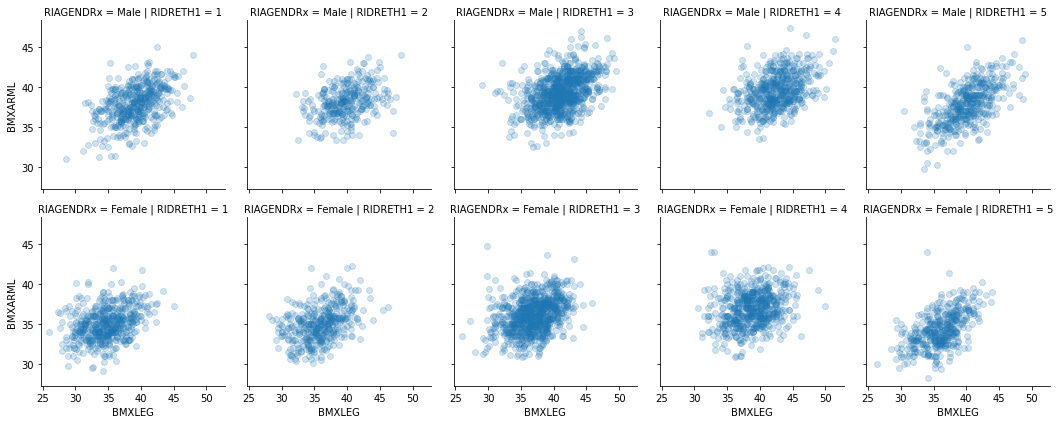

In [19]:
sns.FacetGrid(df, col="RIDRETH1", row="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.2)

## Categorical bivariate data

In [20]:
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
df["DMDMARTLx"] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
db = df.loc[(df.DMDEDUC2x != "Don't know") & (df.DMDMARTLx != "Refused"), :]

In [33]:
x = pd.crosstab(db.DMDEDUC2x, db.DMDMARTLx)
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


In [35]:
x.apply(lambda y: y / y.sum(), axis=1)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


In [38]:
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis=1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

## Mixed categorical and quantitative data 

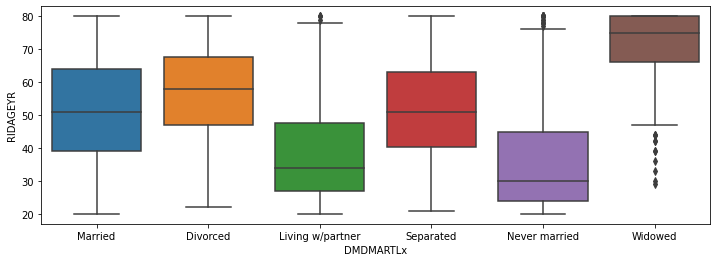

In [41]:
plt.figure(figsize=(12, 4))
a = sns.boxplot(db.DMDMARTLx, db.RIDAGEYR)

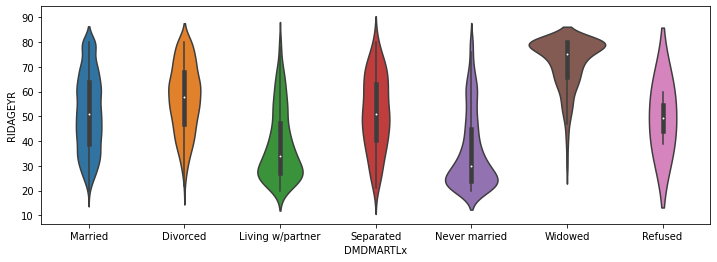

In [45]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(df.DMDMARTLx, df.RIDAGEYR)